In [109]:
%load_ext autoreload
import pickle
import pandas as pd
from glob import glob
from pathlib import Path
import scipy.sparse as sp
from tqdm.notebook import tqdm
from gensim.models.word2vec import Word2Vec

import sys
sys.path.append('../../')

from src.packages.TPPMI.ppmi_model import PPMIModel
from src.packages.TPPMI.tppmi_model import TPPMIModel

from src.visualization.embedding_visualization import \
    plot_cosine_similarity_cade, plot_cosine_similarity_tppmi, print_most_similar_cade

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Setup

In [2]:
number_of_context_words = "2000"
ppmi_path = Path("../../data") / "ppmi-matrices" / "nyt-data" / number_of_context_words

## Load models

In [3]:
ppmi_data_files = sorted(glob(str(ppmi_path  / "*.npz")))
words_files = sorted(glob(str(ppmi_path  / "*.pkl")))

Split context-words from timestamped-vocabularies

In [4]:
context_words_file = [path for path in words_files if "context-words" in path]
ppmi_vocab_files = [path for path in words_files if "context-words" not in path]

In [5]:
ppmi_vocab_files

['../../data/ppmi-matrices/nyt-data/2000/ppmi-1990-01.pkl',
 '../../data/ppmi-matrices/nyt-data/2000/ppmi-1991-01.pkl',
 '../../data/ppmi-matrices/nyt-data/2000/ppmi-1992-01.pkl',
 '../../data/ppmi-matrices/nyt-data/2000/ppmi-1993-01.pkl',
 '../../data/ppmi-matrices/nyt-data/2000/ppmi-1994-01.pkl',
 '../../data/ppmi-matrices/nyt-data/2000/ppmi-1995-01.pkl',
 '../../data/ppmi-matrices/nyt-data/2000/ppmi-1996-01.pkl',
 '../../data/ppmi-matrices/nyt-data/2000/ppmi-1997-01.pkl',
 '../../data/ppmi-matrices/nyt-data/2000/ppmi-1998-01.pkl',
 '../../data/ppmi-matrices/nyt-data/2000/ppmi-1999-01.pkl',
 '../../data/ppmi-matrices/nyt-data/2000/ppmi-2000-01.pkl',
 '../../data/ppmi-matrices/nyt-data/2000/ppmi-2001-01.pkl',
 '../../data/ppmi-matrices/nyt-data/2000/ppmi-2002-01.pkl',
 '../../data/ppmi-matrices/nyt-data/2000/ppmi-2003-01.pkl',
 '../../data/ppmi-matrices/nyt-data/2000/ppmi-2004-01.pkl',
 '../../data/ppmi-matrices/nyt-data/2000/ppmi-2005-01.pkl',
 '../../data/ppmi-matrices/nyt-data/2000

In [6]:
# Get ppmi-matrices and vocab
ppmi_matrices = {}

for filenames in zip(ppmi_vocab_files, ppmi_data_files):
    ppmi_matrix = sp.load_npz(filenames[1])
    with open(filenames[0], "rb") as f:
        vocab = pickle.load(f)
    key = filenames[0].split("ppmi-")[2][0:4]
    ppmi_matrices[key] = {"ppmi_matrix" : ppmi_matrix, "vocab": vocab}

# Get common context-words
with open(context_words_file[0], "rb") as f:
    context_words = pickle.load(f)

In [7]:
ppmi_matrices.keys()

dict_keys(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'])

Create ppmi_model objects

In [8]:
ppmi_models = {key: PPMIModel.construct_from_data(ppmi_data["ppmi_matrix"], ppmi_data["vocab"], context_words, normalize=True) for key, ppmi_data in ppmi_matrices.items()}

In [9]:
tppmi_model = TPPMIModel(ppmi_models, dates="years", smooth=True)

  0%|          | 0/22062 [00:00<?, ?it/s]

In [10]:
print(f"Size of the vocabulary: {tppmi_model.get_vocabulary_size()}")

Size of the vocabulary: 22062


In [11]:
print(f"Size of the vocabulary: {tppmi_model.get_vocabulary_size()}")

Size of the vocabulary: 22062


In [101]:
%autoreload 2
from src.visualization.embedding_visualization import \
    plot_cosine_similarity_cade, plot_cosine_similarity_tppmi, print_most_similar_cade, plot_cosine_similarity_tppmi_2

## Presidents

In [102]:
target_word = "president"
test_words = ["obama", "clinton", "bush"]
elections = ["1992", "2000", "2008"]

['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']


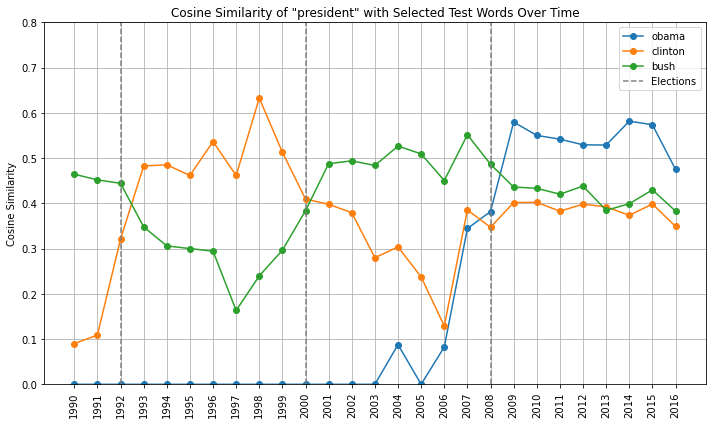

In [105]:
plot_cosine_similarity_tppmi_2(target_word, test_words, tppmi_model, elections=elections)

## Global Conflicts

In [200]:
target_word = "war"
test_words = ["iraq", "afghanistan", "chechnya"]
selected_timesteps = [str(x) for x in range(1990, 2005)]

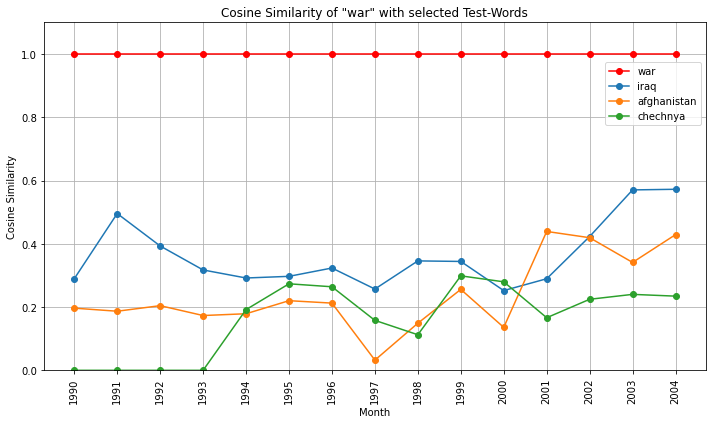

In [201]:
plot_cosine_similarity_tppmi(target_word, test_words, tppmi_model, selected_timesteps=selected_timesteps)

-------

In [165]:
pre = "2004"
post = "2012"
temp_pre = tppmi_model.ppmi_models[pre]
temp_post = tppmi_model.ppmi_models[post]
df_pre = temp_pre.get_as_df()
df_post = temp_post.get_as_df()

In [166]:
# Extract PPMI values for the target word "abortion"
target_word_1 = "bush"
target_word_2 = "obama"
ppmi_pre = df_pre.loc[target_word]
ppmi_post = df_post.loc[target_word_2]

# Combine into a single DataFrame for easier comparison
ppmi_comparison = pd.DataFrame({
    pre: ppmi_pre,
    post: ppmi_post
})

# Sort by PPMI values in descending order
ppmi_comparison_sorted = ppmi_comparison.sort_values(by=pre, ascending=False)

# Display top context words for "abortion"
ppmi_comparison_sorted.head(10)

,2004,2012
george,0.156223,0.060799
president,0.143247,0.155687
presidency,0.124885,0.129205
reelection,0.109855,0.141894
campaign,0.109375,0.120110
nomination,0.108376,0.075617
agenda,0.105614,0.109940
voted,0.104221,0.094938
hampshire,0.101707,0.054552
fla,0.101669,0.000000


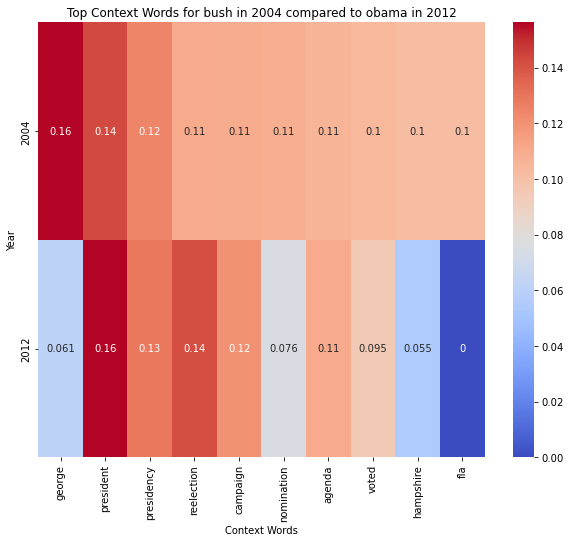

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select top context words
top_context_words = ppmi_comparison_sorted.head(10).index

# Extract data for plotting
data_to_plot = ppmi_comparison_sorted.loc[top_context_words]

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data_to_plot.T, annot=True, cmap='coolwarm')
plt.title(f'Top Context Words for {target_word_1} in {pre} compared to {target_word_2} in {post}')
plt.xlabel('Context Words')
plt.ylabel('Year')
plt.show()

In [169]:
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data (assuming df_2005 and df_2014 are preloaded dataframes as per your setup)
# df_2005 = pd.read_csv('df_2005.csv')  # Example loading
# df_2014 = pd.read_csv('df_2014.csv')  # Example loading

st.title('TPPMI Contextual Analysis')

# Input for target words and years
target_word_1 = st.text_input('Enter First Target Word:', 'bush')
year_1 = st.text_input('Enter Year for First Target Word:', '2004')
target_word_2 = st.text_input('Enter Second Target Word:', 'obama')
year_2 = st.text_input('Enter Year for Second Target Word:', '2012')

if st.button('Analyze'):

    temp_pre = tppmi_model.ppmi_models[year_1]
    temp_post = tppmi_model.ppmi_models[year_2]
    df_pre = temp_pre.get_as_df()
    df_post = temp_post.get_as_df()

    # Extract PPMI values for the target words
    ppmi_1 = df_pre[target_word_1]
    ppmi_2 = df_post[target_word_2]

    # Combine into a single DataFrame for easier comparison
    ppmi_comparison = pd.DataFrame({
        year_1: ppmi_1,
        year_2: ppmi_2
    })

    # Sort by PPMI values in descending order for the first year
    ppmi_comparison_sorted = ppmi_comparison.sort_values(by=year_1, ascending=False)

    # Select top context words
    top_context_words = ppmi_comparison_sorted.head(10).index

    # Extract data for plotting
    data_to_plot = ppmi_comparison_sorted.loc[top_context_words]

    # Plot heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(data_to_plot.T, annot=True, cmap='coolwarm')
    plt.title(f'Top Context Words for {target_word_1} in {year_1} compared to {target_word_2} in {year_2}')
    plt.xlabel('Context Words')
    plt.ylabel('Year')

    # Display the plot
    st.pyplot(plt)

2024-06-12 11:27:00.504 
  command:

    streamlit run /Users/paulschmitt/miniforge3/envs/analysis-test/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]
2024-06-12 11:27:00.505 Session state does not function when running a script without `streamlit run`
